# Task Aim -:  From the given ‘Iris’ dataset, predict the optimum number of  clusters and represent it visually.

# Author -: Aadesh Vishwanath Dukhande

In [1]:
# Let's Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
# Let's Load Data Set

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data , columns= iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df.shape

(150, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
# In Data Set there is Not Null Value

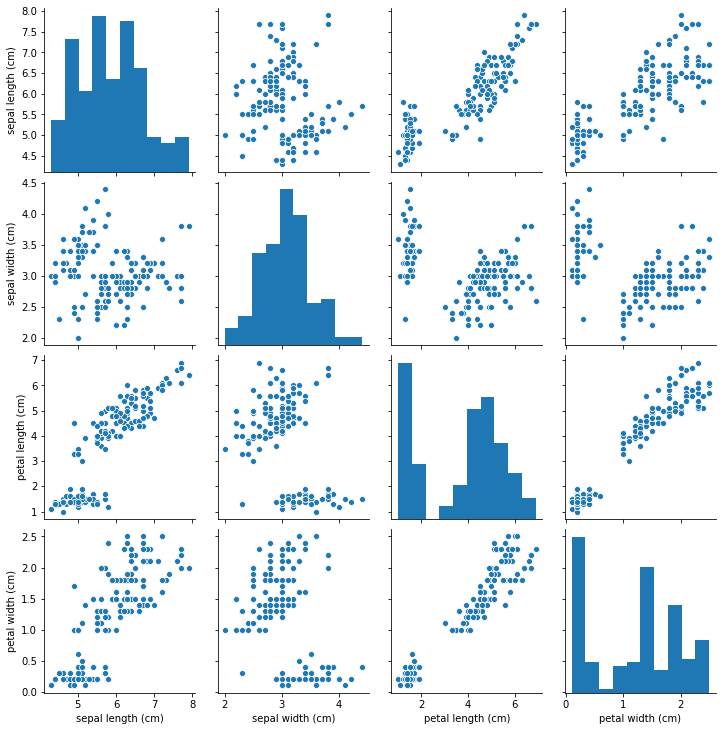

In [11]:
sns.pairplot(df)

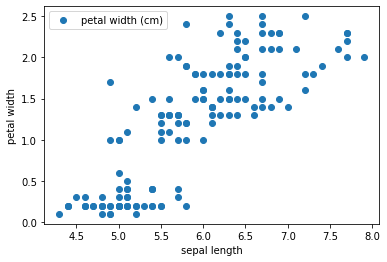

In [13]:
df.plot(x = 'sepal length (cm)' , y = 'petal width (cm)' , style = 'o' )
plt.xlabel("sepal length")
plt.ylabel("petal width")
plt.show()

# Let's Find out Optimum no. of cluster

In [14]:
x = df.iloc[:,[0,1,2,3]].values


In [20]:
# Let's import Cluster Libries

from sklearn.cluster import KMeans

In [22]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init = 'k-means++',
                   max_iter=300 ,n_init=10 , random_state= 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

In [23]:
wcss

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049,
 26.534529220779234]

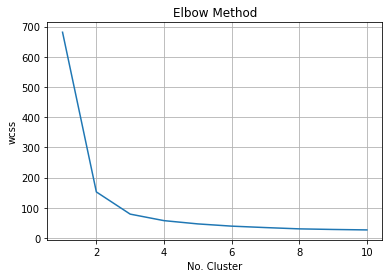

In [26]:
#Let's plot the Graph
plt.plot(range(1,11) , wcss)
plt.title("Elbow Method")
plt.xlabel("No. Cluster")
plt.ylabel("wcss")
plt.grid()
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [27]:
# Let's Apply KMeans on Data Sets

In [30]:
kmeans = KMeans(n_clusters= 3 ,init='k-means++',max_iter=300,
               n_init= 10 ,random_state= 0 )
y_kmeans = kmeans.fit_predict(x)

In [31]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

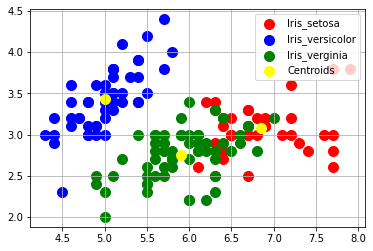

In [46]:
plt.scatter(x[y_kmeans == 0 , 0],x[y_kmeans== 0,1 ],
          s = 100 ,c = 'red' ,label = 'Iris_setosa' )

plt.scatter(x[y_kmeans == 1,0],x[y_kmeans== 1,1 ],
          s = 100 ,c = 'blue' ,label = 'Iris_versicolor')

plt.scatter(x[y_kmeans == 2, 0],x[y_kmeans== 2,1 ],
          s = 100 ,c = 'green' ,label = 'Iris_verginia' )

# Ploting Centroid of cluster

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,
           s = 100 ,c = 'yellow' ,label = 'Centroids')

plt.grid()
plt.legend(loc = 'upper right')
plt.show()